# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [4]:
def P1(num_examples=5):
    ### STUDENT START ###
    # Loop through 'num_examples' times
    for example_index in range(num_examples):
        print("Message Text")
        print("------------")
        
        # Print each message text
        print(train_data[example_index] + "\n")
        print("------------\n")
        
        # Print the label for each message text
        print("Label: {0}".format(newsgroups_train.target_names[train_labels[example_index]]))
        print("\n############################################################################\n")
    ### STUDENT END ###
    
P1(5)

Message Text
------------
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

------------

Label: comp.graphics

############################################################################

Message Text
------------


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [660]:
def P2():
    ### STUDENT START ###
    print("1. Matrix of word unigram feature vectors")
    print("-----------------------------------------")
    
    # Create a CountVectorizer, compute the vocabulary, and convert into feature vectors
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    print("What is the size of the vocabulary? {0} words".format(X.shape[1]))
    
    # Calculate average number of non-zero features per example
    avg_non_zero = X.nnz / X.shape[0]
    print("What is the average number of non-zero features per example? {0}".format(avg_non_zero))
    print("What is the fraction of the non-zero entries in the matrix? {0:2f}%"
          .format(100 * (X.nnz / (X.shape[0] * X.shape[1]))))
    
    # Get the feature names list from the vectorizer
    feature_word_names = vectorizer.get_feature_names()
    feature_word_names.sort()
    print("What are the 0th and last feature strings (in alphabetical order)? 0th: {0}, Last: {1}"
          .format(feature_word_names[0], feature_word_names[-1]))
    
    print()
    
    print("2. Matrix of word unigram feature vectors using your own vocabulary")
    print("-------------------------------------------------------------------")
    
    # Create a CountVectorizer using the predefined vocabulary
    vectorizer2 = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    # Transform the train data into feature vectors using the vocabulary
    X2 = vectorizer2.transform(train_data)
    print("Confirm the size of the vocabulary. Size: {0} words".format(X2.shape[1]))
    
    # Calculate avergae number of non-zero features per example
    avg_non_zero2 = X2.nnz / X2.shape[0]
    print("What is the average number of non-zero features per example? {0}".format(avg_non_zero2))
    
    print()
    
    print("3. Matrix of character bigram and trigram feature vectors")
    print("---------------------------------------------------------")
    
    # Create a CountVectorizer and transform train data into a matrix of character bigram and trigram feature vectors
    vectorizer3 = CountVectorizer(analyzer='char', ngram_range=(2,3))
    X3 = vectorizer3.fit_transform(train_data)
    print("What is the size of the vocabulary? {0} characters".format(X3.shape[1]))
    
    # Transform train data into a matrix of character bigram and trigram feature vectors from text inside word boundaries
    vectorizer4 = CountVectorizer(analyzer='char_wb', ngram_range=(2,3))
    X4 = vectorizer4.fit_transform(train_data)
    print("What is the size of the vocabulary (using char_wb)? {0} characters".format(X4.shape[1]))
    
    print()
    
    print("4. Matrix of word unigram feature vectors with pruning")
    print("------------------------------------------------------")
    
    # Create a CountVectorizer and allow for pruning words that appear in fewer than 10 documents
    vectorizer5 = CountVectorizer(min_df=10)
    X5 = vectorizer5.fit_transform(train_data)
    print("What is the size of the vocabulary? {0} words".format(X5.shape[1]))
    
    print()
    
    print("5. Matrix of word unigram feature vectors (comparison with dev data)")
    print("--------------------------------------------------------------------")
    
    # Create a CountVectorizer and compute the vocabularies for train and dev data
    vectorizer6 = CountVectorizer()
    train_vocab = vectorizer6.fit(train_data).get_feature_names()
    dev_vocab = vectorizer6.fit(dev_data).get_feature_names()
    
    # Calculate fraction of words in dev that is missing from train vocabulary
    fraction_missing = len(set(dev_vocab) - set(train_vocab)) / len(set(dev_vocab))
    print("What is the fraction of words in the development vocabulary that is missing from the training vocabulary? {0:2f}%"
         .format(100 * fraction_missing))
    
    ### STUDENT END ###

P2()

1. Matrix of word unigram feature vectors
-----------------------------------------
What is the size of the vocabulary? 26879 words
What is the average number of non-zero features per example? 96.70599803343165
What is the fraction of the non-zero entries in the matrix? 0.359783%
What are the 0th and last feature strings (in alphabetical order)? 0th: 00, Last: zyxel

2. Matrix of word unigram feature vectors using your own vocabulary
-------------------------------------------------------------------
Confirm the size of the vocabulary. Size: 4 words
What is the average number of non-zero features per example? 0.26843657817109146

3. Matrix of character bigram and trigram feature vectors
---------------------------------------------------------
What is the size of the vocabulary? 35478 characters
What is the size of the vocabulary (using char_wb)? 28954 characters

4. Matrix of word unigram feature vectors with pruning
------------------------------------------------------
What is the s

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [677]:
def P3():
    ### STUDENT START ###
    
    vectorizer = CountVectorizer()
    
    # Transform training data into matrix of word unigram feature vectors
    train_feature_vectors = vectorizer.fit_transform(train_data)
    
    # Transform dev data into matrix of word unigram feature vectors
    dev_feature_vectors = vectorizer.transform(dev_data)
    
    print("k-Nearest Neighbors models")
    print("------------------------------------------------------------------")

    '''
    In choosing range of values of k, I considered the following:
      - If the number of classes is even, choose an odd value for k in order to limit number of ties
      - Setting k = sqrt(n), where n is the number of total samples in the data is typically a good rule of thumb
    
    So, I decided to test odd values of k in the range of 1 to sqrt(n), which is approximately 45
    '''
    sqrt_n = int(np.sqrt(train_feature_vectors.shape[0]))
    k_values = [k for k in range(1, sqrt_n, 2)]
    k_f1 = {}
    
    # Loop through the range of k values
    for k in k_values:
        # Create the KNeighborsClassifier model, train on the train feature vectors, and predict on dev feature vectors
        nearest_neighbor_model = KNeighborsClassifier(n_neighbors=k)
        nearest_neighbor_model.fit(train_feature_vectors, train_labels)
        nn_predictions = nearest_neighbor_model.predict(dev_feature_vectors)
        
        # Calculate the f1-score for each k
        k_f1_score = metrics.f1_score(dev_labels, nn_predictions, average="weighted")
        k_f1[k] = k_f1_score
        print("k = {0}, f1-score= {1}".format(k, k_f1_score))
    
    # Print out the optimal k out of the range of values
    sorted_k_f1 = sorted(k_f1.items(), key=lambda x: x[1], reverse=True)
    print("\nOptimal value: k = {0}, f1-score = {1}".format(sorted_k_f1[0][0], sorted_k_f1[0][1]))
    
    print()
    print("__________________________________________________________________")
    print()
    
    print("Naive Bayes models")
    print("------------------------------------------------------------------")
    
    # Range of values for smoothing
    alphas = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    a_f1 = {}
    
    # Loop through the range of alpha values
    for a in alphas:
        # Create the MultinomialNB model, train on the train feature vectors, and predict on dev feature vectors
        nb_model = MultinomialNB(alpha=a)
        nb_model.fit(train_feature_vectors, train_labels)
        nb_predictions = nb_model.predict(dev_feature_vectors)
        
        # Calculate the f1-score for each alpha
        a_f1_score = metrics.f1_score(dev_labels, nb_predictions, average="weighted")
        a_f1[a] = a_f1_score
        print("alpha = {0}, f1-score = {1}".format(a, a_f1_score))
    
    # Print out the optimal alpha out of the range of values
    sorted_a_f1 = sorted(a_f1.items(), key=lambda x: x[1], reverse=True)
    print("\nOptimal value: alpha = {0}, f1-score = {1}".format(sorted_a_f1[0][0], sorted_a_f1[0][1]))
    
    print()
    print("__________________________________________________________________")
    print()
    
    print("Logistic Regression models")
    print("------------------------------------------------------------------")
    
    # Range of values for regularization strength
    c_vals = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 10.0, 100.0]
    c_f1 = {}
    
    # Loop through the range of C values
    for c in c_vals:
        # Create the LogisticRegression model, train on the train feature vectors, and predict on dev feature vectors
        lr_model = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
        lr_model.fit(train_feature_vectors, train_labels)
        lr_predictions = lr_model.predict(dev_feature_vectors)
        
        # Calculate f1-score for each C value
        c_f1_score = metrics.f1_score(dev_labels, lr_predictions, average="weighted")
        c_f1[c] = c_f1_score
        print("C = {0}, f1-score = {1}".format(c, c_f1_score))
        
        # Calculate the sum of squared weights for each class
        for class_index in range(lr_model.coef_.shape[0]):
            sum_squared_weights = np.sum(np.square(lr_model.coef_[class_index]))
            print('Topic: {0}, Sum of squared weights = {1}'
                 .format(newsgroups_train.target_names[class_index], sum_squared_weights))
        print()
        
    # Print out the optimal regularization strength value out of the range of values
    sorted_c_f1 = sorted(c_f1.items(), key=lambda x: x[1], reverse=True)
    print("Optimal value: C = {0}, f1-score = {1}".format(sorted_c_f1[0][0], sorted_c_f1[0][1]))
    ### STUDENT END ###

P3()

k-Nearest Neighbors models
------------------------------------------------------------------
k = 1, f1-score= 0.3805030018531525
k = 3, f1-score= 0.4084150225437623
k = 5, f1-score= 0.4287607236218357
k = 7, f1-score= 0.45047910006117586
k = 9, f1-score= 0.4365666176198027
k = 11, f1-score= 0.4266108018696209
k = 13, f1-score= 0.42404338833763805
k = 15, f1-score= 0.4326339805547054
k = 17, f1-score= 0.4485853212909305
k = 19, f1-score= 0.4365794782510113
k = 21, f1-score= 0.42609394906353587
k = 23, f1-score= 0.40811738399495695
k = 25, f1-score= 0.41610581482270387
k = 27, f1-score= 0.424466893547113
k = 29, f1-score= 0.4337845889784843
k = 31, f1-score= 0.4469785852923378
k = 33, f1-score= 0.42512355706823746
k = 35, f1-score= 0.4238385877385517
k = 37, f1-score= 0.4320010356161885
k = 39, f1-score= 0.4469776024433899
k = 41, f1-score= 0.4632525209750696
k = 43, f1-score= 0.45068961092221965

Optimal value: k = 41, f1-score = 0.4632525209750696

____________________________________

ANSWER:

### Why doesn't k-Nearest Neighbors work well for this problem?

K-Nearest Neighbors doesn't work well for this problem for the following reasons:
* K-Nearest Neighbors is typically better when working with small data, but tends to underperform in high-dimensional spaces. In other words, K-Nearest Neighbors does suffer from the curse of dimensionality. In this problem, we note that we are working with a high number features (specificaly 26,879 features). As dimensionality increases, so do the necessary number of distance computations during searching for neighbors and samples tend to get farther apart. One possible way in which K-Nearest Neighbors could work well is by adding more data to the data set, thereby increasing the density of the data space and predictive power. However, that is not always feasible and as dimensionality increases, the data tends to become more sparse and thefore KNN starts to lose its predictive power.


* K-Nearest Neighbors also runs under the assumption that nearby neighbors are similar to a given sample represented by feature vectors. However, this may not always be the case in regards to text classification. There can be many instances where two texts represent or provide the same meaning, but are written in entirely different ways using different words. In this case, the features used to represent the samples would be different and therefore would be farther in distance away from each other in the data space, when they should be closer. Thus, this assumption isn't always useful and doesn't necessarily work well for this problem.

### Why doesn't Logistic Regression work as well as Naive Bayes does?

Logistic Regression doesn't work as well as Naive Bayes for this problem for the following reasons:
* Naive bayes benefits from nonlinear decision boundaries, whereas logistic regression is linear. Consequently, this aids in greater improvement of f1 scores using naive bayes vs. logistic regression.


* Additionally, logistic regression is typically a better choice when dealing with much larger datasets and has a tendency to overfit on smaller datasets like this.


* Finally, naive bayes makes the strong assumption of conditional independence that states that each feature is conditionally independent of one another. Although, this may not be entirely true between all features in our problem, holding this assumption true allows naive bayes to outperform logistic regression as it is able to converge faster with small training datasets and highly-correlated features in the data can also cause logistic regression to overfit.

### What is the relationship between logistic regression's sum of squared weights vs. C value?

The C value is interpreted as the inverse of regularization strength and the purpose of regularization is to account for overfitting.

As the C value increases, lambda, also known as the regularization strength, decreases. In this case, the variance of the weights or coefficients gets bigger and as a result, the sum of squared weights also increases. In other words, if the regularization strength is small in L2 regularization, it becomes more difficult to force the weights to be small.

On the other hand, as the C value decreases, lambda or regularization strength increases. In this case, L2 regularization is able to force the weights to be small and get to a more even distribution by reducing the variance in weights. So, the sum of squared weights therefore decreases as there is now greater accountability for overfitting.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

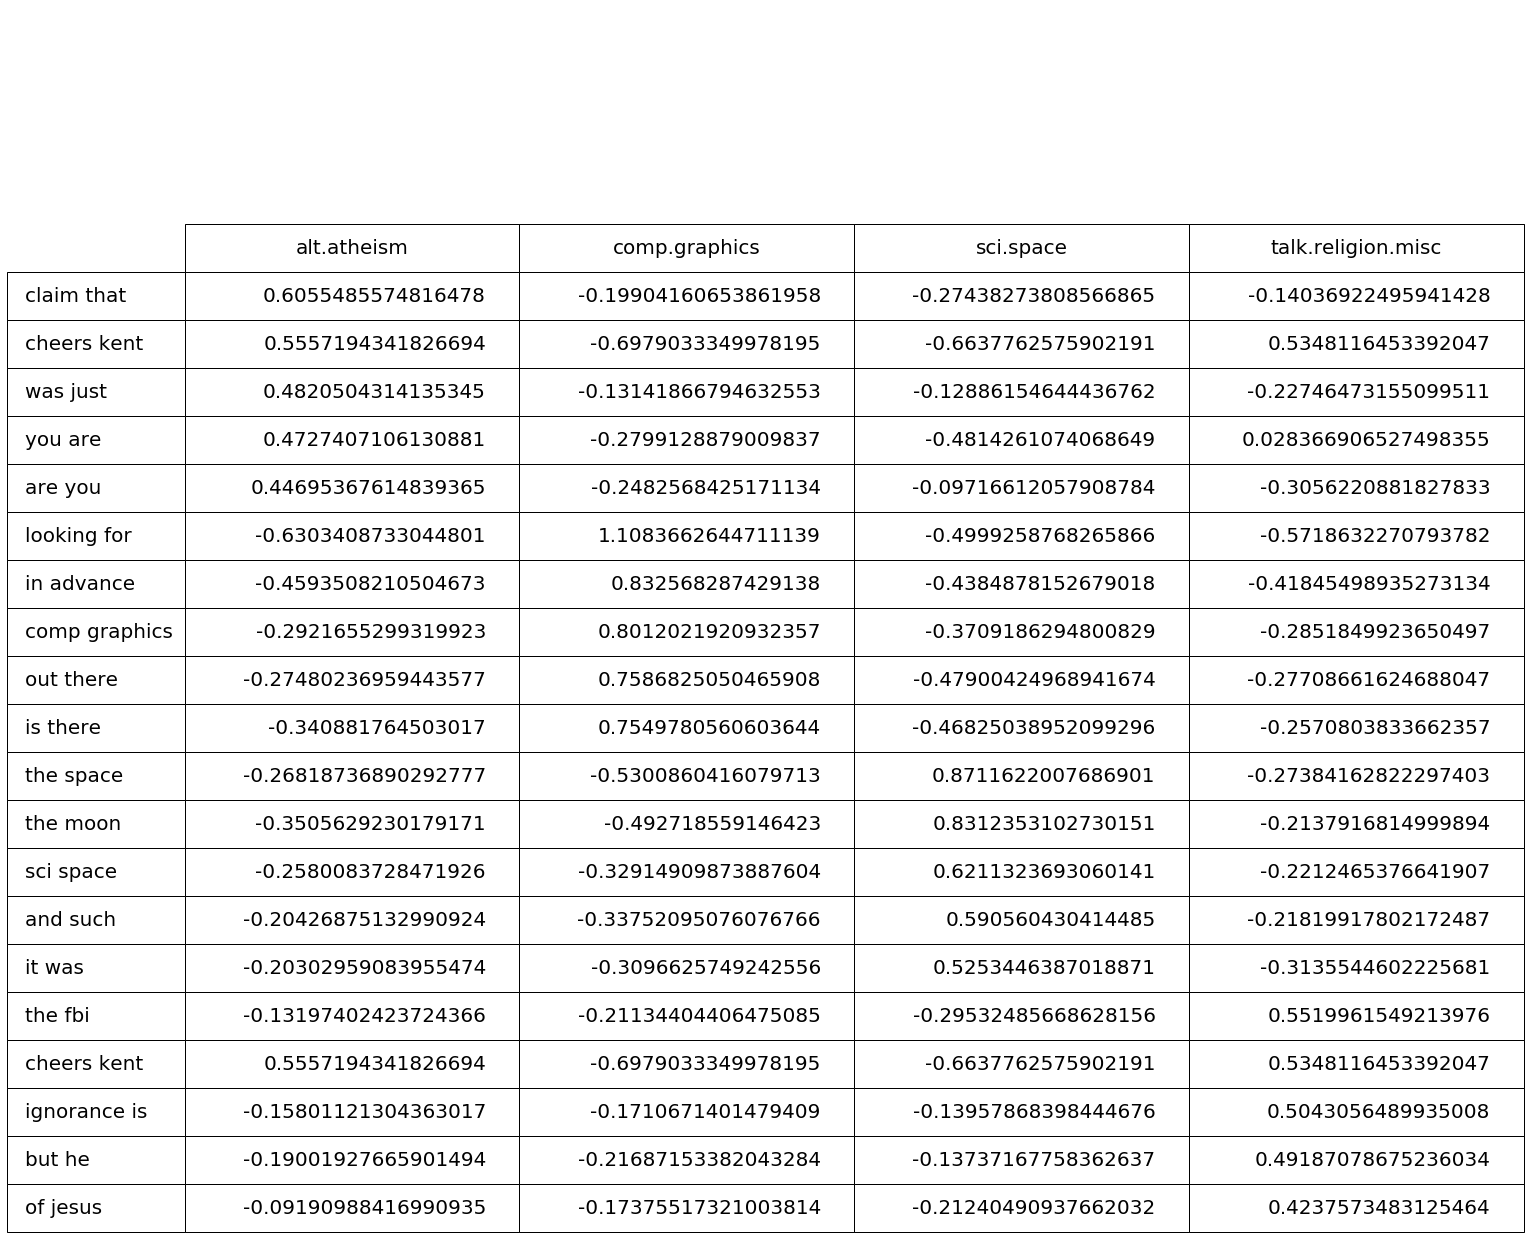

In [683]:
def P4():
    ### STUDENT START ###
    
    # Create a CountVectorizer with bigram features and train on the train_data
    vectorizer = CountVectorizer(ngram_range=(2,2))
    train_bigram_features = vectorizer.fit_transform(train_data)
    
    # Create a Logistic Regression model and train using the transformed train_bigram_features
    lr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr.fit(train_bigram_features, train_labels)
    
    # Initializations needed for output table
    cell_text = np.empty((0, lr.coef_.shape[0]))
    col_labels = newsgroups_train.target_names
    row_labels = []
    feature_indexes = []
    
    # Get indexes of 5 largest weights per topic in descending order
    for topic in range(lr.coef_.shape[0]):
        largest_weights = np.argsort(-1 * lr.coef_[topic])[:5]
        for i in largest_weights:
            feature_indexes.append(i)
            
    # Get the table row labels
    for index in feature_indexes:
        feature_name = vectorizer.get_feature_names()[index]
        row_labels.append(feature_name)
        
    # Get weights for each topic for all 20 features 
    for f in feature_indexes:
        weights = []
        for t in range(lr.coef_.shape[0]):
            weights.append(lr.coef_[t][f])
        cell_text = np.append(cell_text, np.array(weights).reshape(-1, lr.coef_.shape[0]), axis=0)
        
    # Create the table
    table = plt.table(cellText=cell_text, rowLabels=row_labels, colLabels=col_labels)
    table.scale(4,4)
    table.auto_set_font_size(False)
    table.set_fontsize(20)
    axes = plt.gca()
    axes.get_xaxis().set_ticks([])
    axes.get_yaxis().set_ticks([])
    axes.axis('off')
    ### STUDENT END ###

P4()

ANSWER:

### Do you see any surprising features in this table?

Yes, it's definitely surprising that for all target labels but sci.space, the features with the highest and even second-highest weights seemingly have no relation to the category.

For both alt.atheism and talk.religion.misc, we can see that the bigram feature "cheers kent" was the feature with the second largest weight in both categories. Surpisingly, it appears to signify an inappropriate or offensive term and is confusing as to why it would have such large weights for both topics. Additionally, for alt.atheism, it is interesting to note that the rest of the bigram features ("claim that", "was just", "you are", "are you") all appear to be common words that cannot be easily categorized into one topic. Furthermore, the bigram feature "the fbi" has the largest weight for talk.religion.misc, yet without context proves to be unrelated to religion.

Similarly for comp.graphics, we note that the top two features with the largest weights do not clearly designate any relations to the topic of graphics and suprisingly, the feature "comp graphics", which shares the same name as the target label, only appears third out of the five features with the largest weights for comp.graphics.

Finally, it is surprising that sci.space is the only topic for which we see that the top 3 features of "the space", "the moon", and "sci space" actually make sense in regards to the topic.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [706]:
def better_preprocessor(s):
    ### STUDENT START ###
    # Remove the leading and trailing whitespaces
    s = s.strip()
    # Transform strings to lower case
    s = s.lower()
    # Replace single digits and sequence of numbers with 'number'
    s = re.sub('\d+', '00', s)
    # Remove punctuation / symbols
    s = re.sub('[!|,|&|?|.|<|>|-]+', '', s)
    return s
    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    
    # NO PREPROCESSING
    vectorizer = CountVectorizer()
    
    # Transform training data into matrix of word unigram feature vectors
    train_feature_vectors = vectorizer.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_feature_vectors = vectorizer.transform(dev_data)
    
    # Create a Logistic Regression model, train using train_feature_vectors, and predict on the dev_feature_vectors
    lr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr.fit(train_feature_vectors, train_labels)
    lr_predictions = lr.predict(dev_feature_vectors)
    print("No Preprocessing")
    print("----------------")
    print("f1-score = {0}, Dictionary size: {1}"
          .format(metrics.f1_score(dev_labels, lr_predictions, average="weighted"), len(vectorizer.vocabulary_.keys())))
    
    print()
    
    # WITH PREPROCESSING INCLUDING stop_words='english' TO REMOVE ENGLISH STOP WORDS
    vectorizer_improved = CountVectorizer(preprocessor=better_preprocessor, stop_words='english')
    
    # Transform training data into matrix of word unigram feature vectors
    train_preprocessed = vectorizer_improved.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_preprocessed = vectorizer_improved.transform(dev_data)
    
    # Create a Logistic Regression model and train the model and predict using the preprocessed train/dev features
    lr_improved = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr_improved.fit(train_preprocessed, train_labels)
    lr_improved_predictions = lr_improved.predict(dev_preprocessed)
    print("With Preprocessing")
    print("------------------")
    print("f1-score = {0}, Dictionary size: {1}"
          .format(metrics.f1_score(dev_labels, lr_improved_predictions, average="weighted"), 
                  len(vectorizer_improved.vocabulary_.keys())))
    
    print()
    
    print("The improved model reduced the vocabulary size by {0} words."
          .format(len(vectorizer.vocabulary_.keys()) - len(vectorizer_improved.vocabulary_.keys())))
    
    ### STUDENT END ###
    
P5()

No Preprocessing
----------------
f1-score = 0.710072965652832, Dictionary size: 26879

With Preprocessing
------------------
f1-score = 0.7314741334265664, Dictionary size: 26388

The improved model reduced the vocabulary size by 491 words.


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

C = 0.01, Vocabulary Size: 17, f1-score = 0.4625536287338924
C = 0.1, Vocabulary Size: 213, f1-score = 0.6976851845998518
C = 0.3, Vocabulary Size: 514, f1-score = 0.6775628223444169
C = 0.5, Vocabulary Size: 750, f1-score = 0.6710274685520622
C = 1.0, Vocabulary Size: 1137, f1-score = 0.6754630161038019
C = 2.0, Vocabulary Size: 1641, f1-score = 0.6886279438441723
C = 5.0, Vocabulary Size: 2669, f1-score = 0.7079185113989299
C = 10.0, Vocabulary Size: 3049, f1-score = 0.6988950511942892


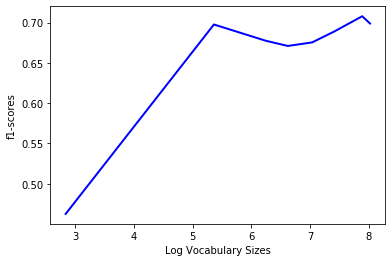

In [687]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    c = [0.01, 0.1, 0.3, 0.5, 1.0, 2.0, 5.0, 10.0]
    vocab_sizes = []
    f1_scores = []
    
    vectorizer = CountVectorizer()
    
    # Transform training data into matrix of word unigram feature vectors
    train_feature_vectors = vectorizer.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_feature_vectors = vectorizer.transform(dev_data)
    
    # Loop through regularization strengths
    for cval in c:
        # Create a Logistic Regression model using L1 regularization
        lr = LogisticRegression(C=cval, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015)
        lr.fit(train_feature_vectors, train_labels)
        
        vocab = []
        
        # Loop through all the weights in a row
        for i in range(lr.coef_.shape[1]):
            # Check if there is at least one non-zero weight in each column of weights among the four categories
            if any(lr.coef_[:,i]):
                feature = vectorizer.get_feature_names()[i]
                vocab.append(feature)
        
        vocab_sizes.append(len(vocab))
        
        # Create the CountVectorizer and pass in the vocabulary of features included after L1 regularization
        l2vectorizer = CountVectorizer(vocabulary=vocab)
        
        # Transform training data into matrix of word unigram feature vectors
        l2_train_features = l2vectorizer.transform(train_data)
        # Transform dev data into matrix of word unigram feature vectors
        l2_dev_features = l2vectorizer.transform(dev_data)
        
        # Create a Logistic Regression model using the default L2 regularization
        lr2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2")
        # Train on the train features and predict on the dev features
        lr2.fit(l2_train_features, train_labels)
        lr2_predictions = lr2.predict(l2_dev_features)
        
        # Caluclate the f1-score
        f1 = metrics.f1_score(dev_labels, lr2_predictions, average="weighted")
        f1_scores.append(f1)
        
        print("C = {0}, Vocabulary Size: {1}, f1-score = {2}"
             .format(cval, len(vocab), f1))
    
    # Plot f1-score vs. log vocabulary sizes
    plt.plot(np.log(vocab_sizes), f1_scores, color='blue', linewidth=2)
    plt.xlabel('Log Vocabulary Sizes')
    plt.ylabel('f1-scores')
    plt.show()
    
    ### STUDENT END ###

P6()

ANSWER:

### How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Performance of model based on full vocabulary (from part 5): f1-score = 0.710072965652832

As can be seen above in the program output, the f1-scores of the models based on reduced vocabularies remain lower than that of the model based on the full vocabulary. In other words, the performance of the models based on reduced vocabularies tends to be lower than that of a model based on the full vocabulary.

It can also be observed on the graph that as the log of the vocabulary sizes increases, the f1-scores appear to cap off around just a little over 0.70. For larger values of C, the f1-scores may increase a bit higher, but the model would also possibly start to overfit and performance eventually tends to stabalize.

Additionally, as dimensionality decreases, each sample text will be represented by a fewer number of features. Through a reduction of the features, it could become difficult for the model to correctly differentiate samples from one another and clearly associate a target label. Therefore, the model would start to lose some predictive power.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [699]:
def P7():
    ### STUDENT START ###
    vectorizer = CountVectorizer()
    
    # Transform training data into matrix of word unigram feature vectors
    train_features = vectorizer.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_features = vectorizer.transform(dev_data)
    
    # Create a Logistic Regression model, train on the train_features, and predict on the dev_features
    lr = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    lr.fit(train_features, train_labels)
    lr_preds = lr.predict(dev_features)
    
    print("CountVectorizer: f1-score = {0}".format(metrics.f1_score(dev_labels, lr_preds, average="weighted")))
    
    tfidf_vectorizer = TfidfVectorizer()
    
    # Transform training data into matrix of word unigram feature vectors
    train_feature_vectors = tfidf_vectorizer.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_feature_vectors = tfidf_vectorizer.transform(dev_data)
    
    # Create a Logistic Regression model and train and predict with the train/dev feature vectors using tfidf scores
    lr_model = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    lr_model.fit(train_feature_vectors, train_labels)
    lr_model_preds = lr_model.predict(dev_feature_vectors)
    
    print("TfidfVectorizer: f1-score = {0}".format(metrics.f1_score(dev_labels, lr_model_preds, average="weighted")))
    
    print()
    
    # Show confusion matrix to see what mistakes the model is making
    confusionMatrix = confusion_matrix(dev_labels, lr_model_preds, labels=[0, 1, 2, 3])
    print("Confusion Matrix:\n")
    print(confusionMatrix)
    
    print()
    
    # Show the 3 documents with the highest R ratio
    probs = lr_model.predict_proba(dev_feature_vectors)
    doc_ratio = {}
    predicted_correct_labels = {}
    
    # Loop through each document
    for document in range(probs.shape[0]):
        # Grab the index and value of the maximum predicted probability
        max_predicted_index = np.argmax(probs[document])
        max_predicted_prob = probs[document][max_predicted_index]
        
        # Get the correct predicted probability based on the target label of the document
        correct_predicted_prob = probs[document][dev_labels[document]]
        
        # Calculate the R ratio
        r_ratio = max_predicted_prob / correct_predicted_prob
        doc_ratio[document] = r_ratio
        predicted_correct_labels[document] = [newsgroups_train.target_names[max_predicted_index], 
                                              newsgroups_train.target_names[dev_labels[document]]]
    
    # Sort the documents in descending order based on their R ratio values
    sorted_doc_ratio = sorted(doc_ratio.items(), key=lambda x: x[1], reverse=True)
    
    print("3 Documents with highest R ratio")
    print("--------------------------------")
    print()
    
    # Display the top 3 documents with the highest R ratio values
    for i in range(3):
        doc_index = sorted_doc_ratio[i][0]
        print("Predicted label: {0}".format(predicted_correct_labels[doc_index][0]))
        print("Actual label: {0}".format(predicted_correct_labels[doc_index][1]))
        print("R ratio: {0}\n".format(sorted_doc_ratio[i][1]))
        print(dev_data[doc_index])
        print("--------------------------------------------------------------\n")
    ### STUDENT END ###

P7()

CountVectorizer: f1-score = 0.6828092853619281
TfidfVectorizer: f1-score = 0.7597662427853104

Confusion Matrix:

[[102  11  19  33]
 [  5 168  10   2]
 [ 10  20 165   4]
 [ 31  10   5  81]]

3 Documents with highest R ratio
--------------------------------

Predicted label: comp.graphics
Actual label: talk.religion.misc
R ratio: 929.3578067953478

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted 

ANSWER:

### How is TfidfVectorizer different than CountVectorizer?

When using CountVectorizer to train and transform the data, it simply maps each feature (ie. words) to its term frequency, or the number of times it appears in a given document. In this case, there is greater bias towards the most frequent terms in documents and they would overshadow more rare terms that could have greater significance to the labeling of the document.

On the other hand, TfidfVectorizer re-weights the count features into tf-idf scores. In other words, TfidfVectorizer maps each feature to its tf-idf score. tf-idf simply refers to the term frequency times inverse document frequency. In tf-idf, term frequency remains the same as in CountVectorizer, but the inverse document frequency refers to the number of documents in the document set that contain a given term / feature. 

Specifically, scikit-learn calculates idf values in the following manner:

$idf(t) = log\frac{n}{1 + df(t)}$

**t** - term / feature

**n** - total # of documents in the document set

**df(t)** - document frequency of term / feature t or the # of documents in the document set that contain the term / feature

Through TfidfVectorizer, words that are most frequent would have lower tf-idf scores, whereas the more rare terms would have higher tf-idf scores. Thus, this enables the model to learn more from the significant terms in each document.

### Explain what the R ratio describes. What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

The R ratio is simply the magnitude of misclassification. In other words, it essentially describes how badly the model mistakes its predictions.

Following are a few mistakes that the model is making:

1) To better understand misclassification, I added up each of the misclassified counts in each column of the confusion matrix.

**alt.atheism**: 5 + 10 + 31 = **46**

**comp.graphics**: 11 + 20 + 10 = 41

**sci.space**: 19 + 10 + 5 = 34

**talk.religion.misc**: 33 + 2 + 4 = 39

Each of the above sums can be interpreted as such:

Out of all the documents, *alt.atheism* is inaccurately predicted as the label *46* times.

And so forth...

As we can see from the above sums, **alt.atheism** is the label that is inacurrately predicted most often.

2) Additionally, both *alt.atheism* and *talk.religion.misc* labels are most confused with each other. Specifically, there are 33 instances when atheism documents were predicted as religion and 31 instances when religion documents were predicted as atheism.

---

Following is my method to address the issue of the prediction misclassification of atheism:

Create a list of all the alt.atheism-labeled documents from the training data. Use a TfidfVectorizer to learn the vocabulary of the atheism training data. Loop through the words in the atheism vocabulary and find the idf values for words that are at least 4 characters long so that they're more complex terms. Grab the top 20 of these words with the lowest idf values. Low idf values here indicate that these terms are most frequent in atheism documents. By removing these most common words within atheism-labeled documents from the full train data, it would utlimately remove atheism-common words from all documents. As a result, it would help differentiate non-atheism documents from the atheism label and allow atheism documents to stand out more. Therefore, misclassification of atheism should decrease.


### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [723]:
def better_preprocessor2(s):
    ### STUDENT START ###
    # Remove the leading and trailing whitespaces
    s = s.strip()
    # Transform strings to lower case
    s = s.lower()
    # Replace single digits and sequence of numbers with 'number'
    s = re.sub('\d+', '00', s)
    
    return s
    ### STUDENT END ###

def get_ath_stop_words():
    # Create a list of alt.atheism-labeled documents
    ath = [train_data[x] for x in range(len(train_data)) if train_labels[x] == 0]
    
    # Create a TfidfVectorizer and remove the English stop words
    ath_vectorizer = TfidfVectorizer(stop_words='english')
    
    # Transform ath training data into matrix of word unigram feature vectors
    ath_train_features = ath_vectorizer.fit_transform(ath)
    # Get the atheism vocabulary list
    ath_vocab = ath_vectorizer.get_feature_names()
    idf_scores = {}
    
    # Loop through each word index in the atheism vocabulary list
    for word in range(len(ath_vocab)):
        # Filter out words that are less than 4 characters long 
        if len(ath_vocab[word]) >= 4:
            # Get the idf score of the word
            idf_val = ath_vectorizer.idf_[word]
            # Store the word associated with its idf score in the idf_scores dictionary
            idf_scores[ath_vocab[word]] = idf_val
    
    # Sort the idf_scores dictionary by idf scores in ascending order
    sorted_idf_scores = sorted(idf_scores.items(), key=lambda x: x[1])
    # Grab the top 20 words with the lowest idf scores
    ath_stop_words = [sorted_idf_scores[x][0] for x in range(20)]
    
    print("--- Top 20 words from the atheism vocabulary that are most common in atheism documents ---\n")
    
    # Print out the top 20 words with their idf scores
    for i in ath_stop_words:
        print("Word: {0}, idf: {1})".format(i, idf_scores[i]))
        
    print("--------------------------------------------------------------------------------------------\n")
    
    return ath_stop_words

def P8():
    # Get the top 20 words from atheism to use for stop_words
    ath_stop_words = get_ath_stop_words()
    
    # Create a TfidfVectorizer with the better_proprocessor2 and ath_stop_words list
    tfidf_vectorizer2 = TfidfVectorizer(preprocessor=better_preprocessor2, stop_words=ath_stop_words)
    # Transform training data into matrix of word unigram feature vectors
    train_feature_vectors2 = tfidf_vectorizer2.fit_transform(train_data)
    # Transform dev data into matrix of word unigram feature vectors
    dev_feature_vectors2 = tfidf_vectorizer2.transform(dev_data)
    
    # Create a Logistic Regression model and train and predict with the train/dev feature vectors using tfidf scores
    lr_model2 = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    lr_model2.fit(train_feature_vectors2, train_labels)
    lr_model_preds2 = lr_model2.predict(dev_feature_vectors2)
    
    print("TfidfVectorizer: f1-score = {0}".format(metrics.f1_score(dev_labels, lr_model_preds2, average="weighted")))
    
    # Show confusion matrix to see what mistakes the model is making
    confusionMatrix2 = confusion_matrix(dev_labels, lr_model_preds2, labels=[0, 1, 2, 3])
    print("\nConfusion Matrix:\n")
    print(confusionMatrix2)
    
    print()
    
    # Show the 3 documents with the highest R ratio
    probs2 = lr_model2.predict_proba(dev_feature_vectors2)
    doc_ratio2 = {}
    predicted_correct_labels2 = {}
    
    # Loop through each document
    for document in range(probs2.shape[0]):
        # Grab the index and value of the maximum predicted probability
        max_predicted_index2 = np.argmax(probs2[document])
        max_predicted_prob2 = probs2[document][max_predicted_index2]
        
        # Get the correct predicted probability based on the target label of the document
        correct_predicted_prob2 = probs2[document][dev_labels[document]]
        
        # Calculate the R ratio
        r_ratio2 = max_predicted_prob2 / correct_predicted_prob2
        doc_ratio2[document] = r_ratio2
        predicted_correct_labels2[document] = [newsgroups_train.target_names[max_predicted_index2], 
                                              newsgroups_train.target_names[dev_labels[document]]]
    
    # Sort the documents in descending order based on their R ratio values
    sorted_doc_ratio2 = sorted(doc_ratio2.items(), key=lambda x: x[1], reverse=True)
    
    print("3 Documents with highest R ratio")
    print("--------------------------------")
    print()
    
    # Display the top 3 documents with the highest R ratio values
    for i in range(3):
        doc_index2 = sorted_doc_ratio2[i][0]
        print("Predicted label: {0}".format(predicted_correct_labels2[doc_index2][0]))
        print("Actual label: {0}".format(predicted_correct_labels2[doc_index2][1]))
        print("R ratio: {0}\n".format(sorted_doc_ratio2[i][1]))
        print(dev_data[doc_index2])
        print("--------------------------------------------------------------\n")
    
P8()

--- Top 20 words from the atheism vocabulary that are most common in atheism documents ---

Word: people, idf: 2.2930653475193905)
Word: think, idf: 2.3883755273237153)
Word: just, idf: 2.4484794513934203)
Word: like, idf: 2.5411382818761252)
Word: does, idf: 2.6011562916023783)
Word: know, idf: 2.6011562916023783)
Word: time, idf: 2.79384063543188)
Word: said, idf: 2.8320618482520774)
Word: make, idf: 2.8992011510897058)
Word: good, idf: 2.956359564929654)
Word: believe, idf: 2.9711746507147954)
Word: religion, idf: 2.9711746507147954)
Word: thing, idf: 3.0815227078836607)
Word: point, idf: 3.098329826200042)
Word: really, idf: 3.132816002271211)
Word: things, idf: 3.132816002271211)
Word: atheism, idf: 3.1685340848732904)
Word: fact, idf: 3.1685340848732904)
Word: mean, idf: 3.1685340848732904)
Word: right, idf: 3.1685340848732904)
--------------------------------------------------------------------------------------------

TfidfVectorizer: f1-score = 0.7815214180952513

Confusion Ma

### Notes
---

From part 7, the f1-score using the TfidfVectorizer is 0.7597662427853104.
After applying my method to address the issue, the f1-score has increased by approximately 0.022 to 0.7815214180952513.

Looking at the confusion matrix, I note the following:
* The number of correct classifications of atheism documents has increased from 102 to 104.


* Summing up the prediction misclassification counts for the atheism column: 6 + 7 + 29 = 42. Compared to the 46 misclassifications from part 7, it can now be stated that out of all the documents, *alt.atheism* is inaccurately predicted as the label *42* times, which is a decrease by 4.


* It was also observed in part 7 that there are 33 instances when atheism documents were predicted as religion and 31 instances when religion documents were predicted as atheism. However, there are now only 30 instances when atheism documents were predicted as religion and 29 instances when religion documents were predicted as atheism, which is a clear improvement in the number of misclassifications.


Finally, in comparison to the R ratio values in part 7, the R ratio values have now decreased, indicating that the magnitude of misclassification has decreased overall. In other words, compared to part 7, the model isn't doing as badly in its mistakes for predictions.